In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
all_data = pd.read_csv('C:\\Users\\Julie\\Downloads\\heart-disease-uci\\heart.csv')

In [3]:
all_data.size

4242

In [4]:
all_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
all_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Delete duplicates

#return 303 boolean values (303 entries)
duplicated_entries = all_data.duplicated()

#(in the future, do .duplicated(keep = False) to show all duplicates
#created a dataframe 
duplicated_entries2 = pd.Series.to_frame(duplicated_entries)
print(duplicated_entries2.loc[duplicated_entries2.loc[:,0] == True])
#at position 164, there is a duplicate, hence the returned "True"
#so this means 164 is a duplicate lets find a row with the same values




        0
164  True


In [7]:
all_data.loc[all_data.loc[:,'chol']==175.0]
# here it is clear that 163 and 164 are duplicated rows, searching by cholesterol 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
duplicate_free_frame = all_data.drop(all_data.index[164])

In [9]:
duplicate_free_frame.loc[162:166]
#this shows that the duplicated row, 164 is now deleted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [10]:
duplicate_free_frame = duplicate_free_frame.reset_index()
#reset the index to make it perfectly indexed with no missing numbers

In [11]:
del duplicate_free_frame['index']

In [12]:
duplicate_free_frame.loc[163:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
166,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0


In [13]:
duplicate_free_frame.columns
#shows existing column names

duplicate_free_frame.columns = ['age', 'gender', 'chst_pain', 'rst_bld_prsr', 'cholest', 'fst_bld_sgr', 'rst_ekg', 'mx_hrt_rt', 'exrcs_ang', 'st_dprsn', 'slope', 'count', 'thal', 'trgt']
#rename columns to nicer, more descriptive names

In [14]:
duplicate_free_frame.head()

,age,gender,chst_pain,rst_bld_prsr,cholest,fst_bld_sgr,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


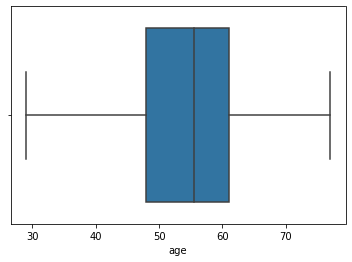

In [15]:
#visulalize features with corelations
#first checking age with a box and whisker plot 
ax1 = sns.boxplot(duplicate_free_frame['age'])


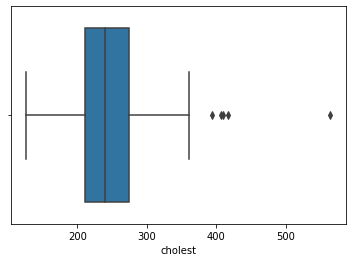

In [16]:
ax2 = sns.boxplot(duplicate_free_frame['cholest'])
#here we see outliers

([<matplotlib.axis.XTick at 0x29f4a33ada0>,
 <a list of 2 Text xticklabel objects>)

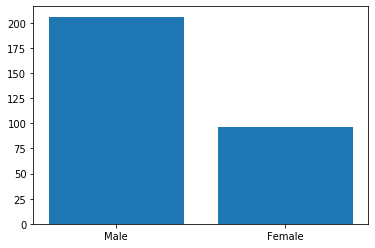

In [17]:
#check gender distribution
df_length = len(duplicate_free_frame)
male = sum(duplicate_free_frame['gender'])
numbers = [male, df_length-male]
objects=('Male', 'Female')
y_pos = np.arange(len(objects))
plt.bar(y_pos, numbers)
plt.xticks(y_pos, objects)
# ax1 = sns.countplot(duplicate_free_frame["gender"] ,palette = "BuPu")
# plt.title("Gender Distribution", size=30)
# plt.ylabel("Frequency", labelpad=40, size=20)
# plt.legend(['lol', 'swag'])



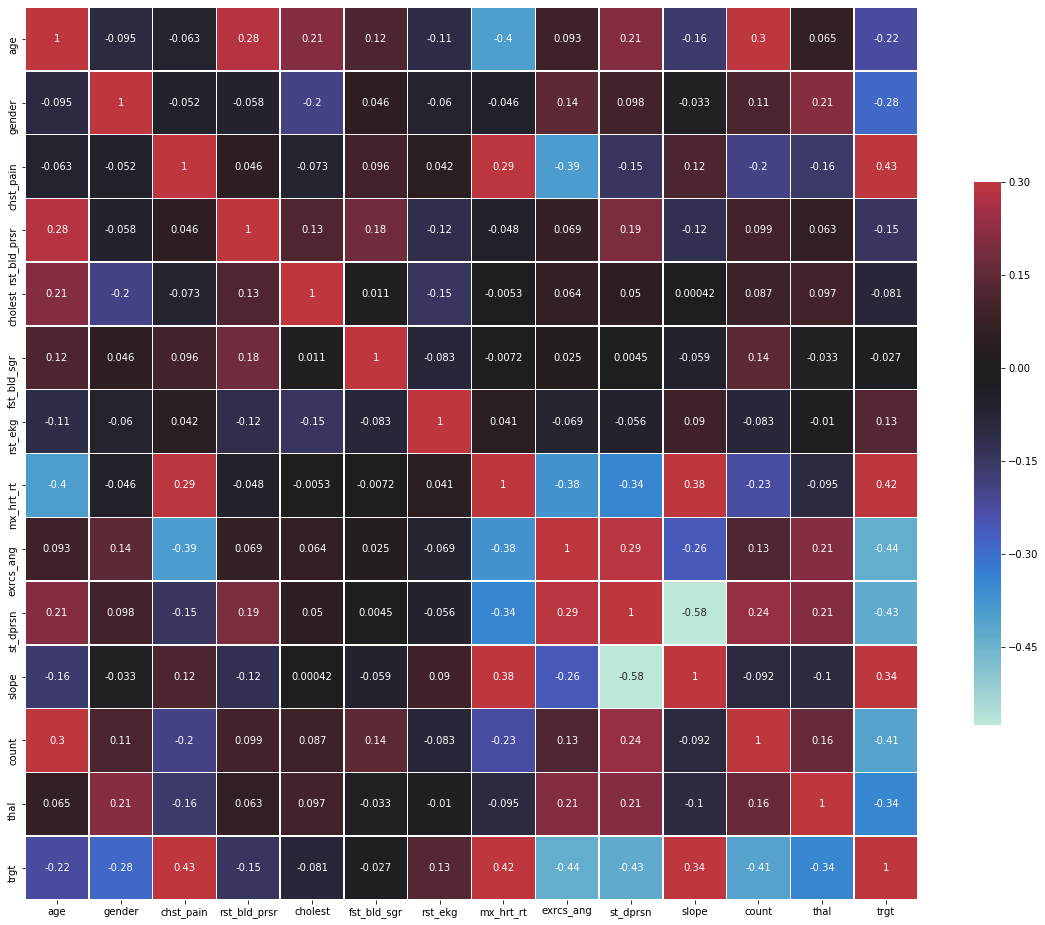

In [18]:
#next we will look at corellations via multivariate analyses

#1st a heat map
plt.figure(figsize=(20,20))
sns.heatmap(duplicate_free_frame.corr(),vmax=.3, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink":.5}, annot=True)
plt.show()

In [19]:
#the strongest correlation appears to be between st_depression and slope

C:\Users\Julie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


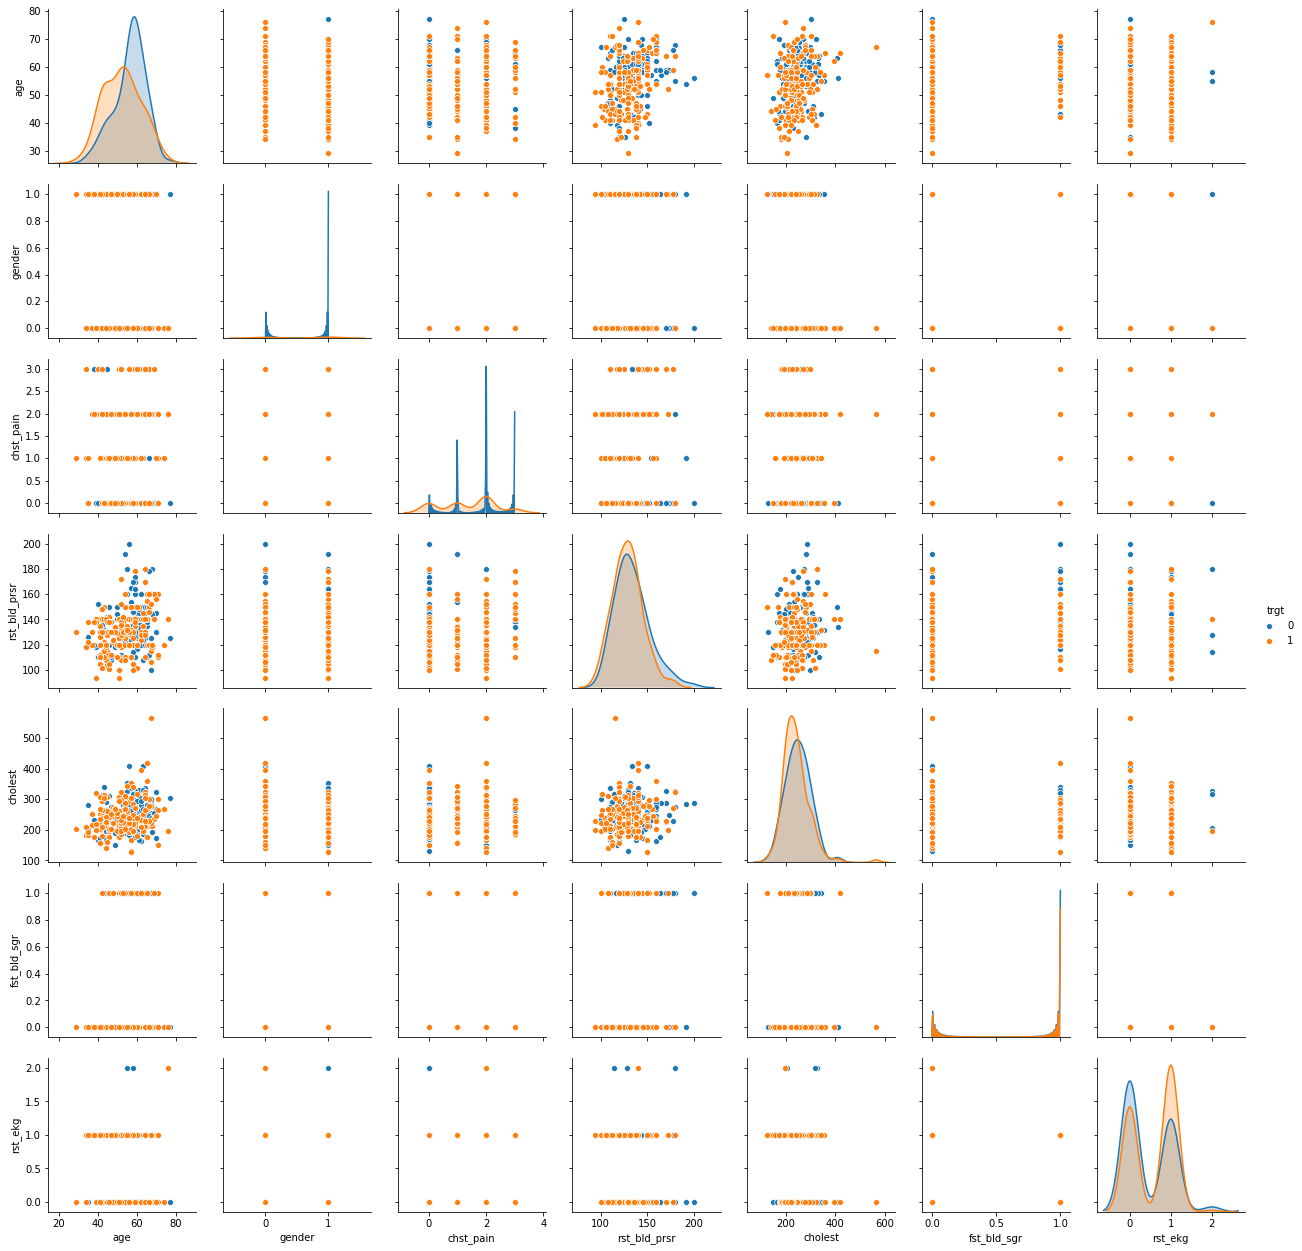

In [20]:
sns.pairplot(duplicate_free_frame,vars = ['age', 'gender', 'chst_pain', 'rst_bld_prsr', 'cholest', 'fst_bld_sgr', 'rst_ekg'],hue='trgt')


C:\Users\Julie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Julie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Julie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


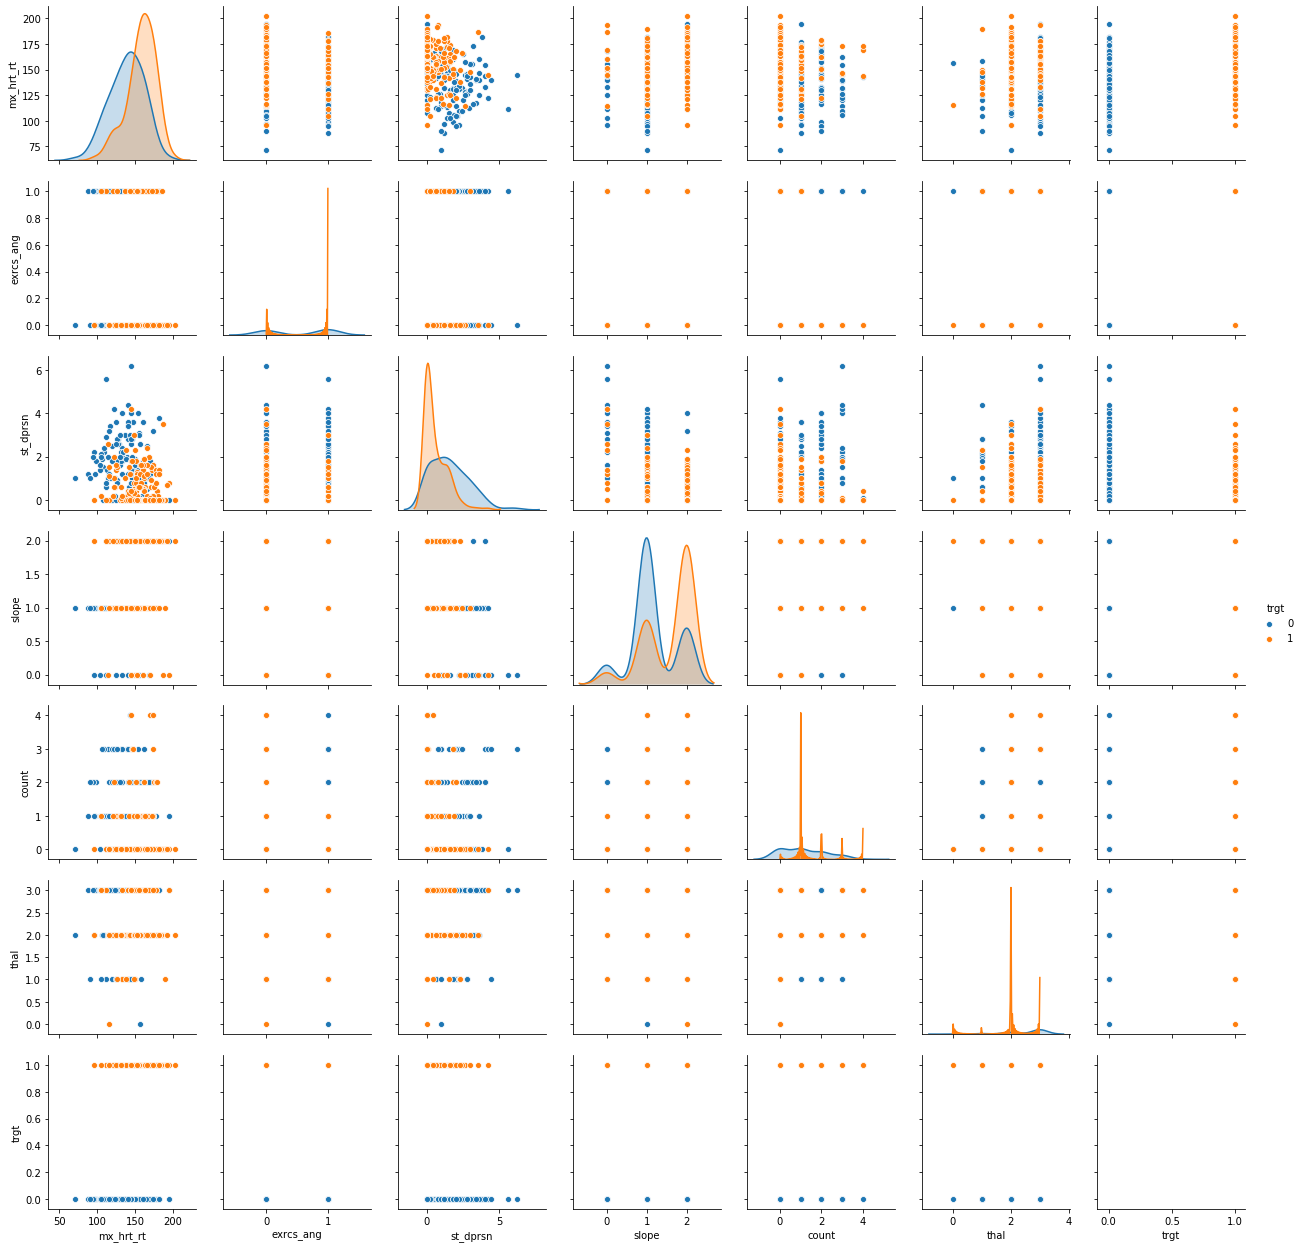

In [100]:
sns.pairplot(duplicate_free_frame,vars = ['mx_hrt_rt', 'exrcs_ang', 'st_dprsn', 'slope', 'count', 'thal', 'trgt'],hue='trgt')


In [101]:
#st depression stands out

In [102]:
duplicate_free_frame.head()

,age,chst_pain,cholest,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,3,233,0,150,0,2.3,0,0,1,1
1,37,2,250,1,187,0,3.5,0,0,2,1
2,41,1,204,0,172,0,1.4,2,0,2,1
3,56,1,236,1,178,0,0.8,2,0,2,1
4,57,0,354,1,163,1,0.6,2,0,2,1


In [103]:
#in the preprocessing stage, let's find features that are more and less important before 
#jumping into training so that the training will be faster due to less computations

In [104]:
#sliced up the df into "heart attack" and "not heart attack" df's
#1 = heart disease, 0 = no heart disease
#the goal is to find some patterns and least important features
heart_disease = duplicate_free_frame.loc[duplicate_free_frame.loc[:,'trgt']==1.0]
not_heart_disease = duplicate_free_frame.loc[duplicate_free_frame.loc[:,'trgt']==0.0]

In [96]:
print(len(heart_disease))
print(len(not_heart_disease))

164
138


In [98]:
df_length = len(not_heart_disease)
male = sum(not_heart_disease['gender'])
numbers = [male, df_length-male]
#female = df_length-male
objects=('Male', 'Female')
y_pos = np.arange(len(objects))
plt.bar(y_pos, numbers)
plt.xticks(y_pos, objects)


KeyError: 'gender'

In [105]:
df_length = len(heart_disease)
male = sum(heart_disease['gender'])
numbers = [male, df_length-male]
objects=('Male', 'Female')
y_pos = np.arange(len(objects))
plt.bar(y_pos, numbers)
plt.xticks(y_pos, objects)

#it's odd that males have more heart disease and less heart disease in this selection, depending on the graph

KeyError: 'gender'

In [31]:
len(duplicate_free_frame['gender'])
perc_all = 100 * sum(duplicate_free_frame['gender'])/len(duplicate_free_frame['gender'])
print('% of men in the entire dataset = ' + str(perc_all))
print("...So this means there are only " + str(100- perc_all) + " % women in the dataset")
perc_heart_disease = 100 * sum(heart_disease['gender'])/len(heart_disease['gender'])
print('% of men with heart disease = ' + str(perc_heart_disease))

perc_no_heart_disease = 100 * sum(not_heart_disease['gender'])/len(not_heart_disease['gender'])
print('% of men without heart disease = ' + str(perc_no_heart_disease))

% of men in the entire dataset = 68.21192052980132
...So this means there are only 31.78807947019868 % women in the dataset
% of men with heart disease = 56.09756097560975
% of men without heart disease = 82.6086956521739


In [32]:
male = sum(heart_disease['gender'])
female = len(heart_disease) - sum(heart_disease['gender'])
#how big is the percantage of female and male
#if the percantege is close to 50 percent, then the feature delivers no real valuable information

fem_perc = 100*female/len(heart_disease)
male_perc = 100*male/len(heart_disease)

print('Male   % ' + str(male_perc))
print('Female % ' + str(fem_perc))

#it's close to 50/50 so it seems that gender is not that important
#we can delete this column



Male   % 56.09756097560975
Female % 43.90243902439025


C:\Users\Julie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


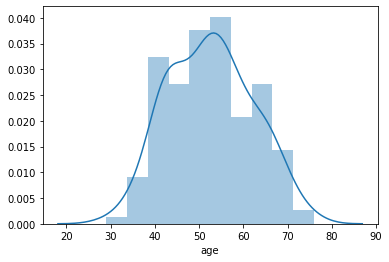

In [33]:
ax1 = sns.distplot(heart_disease['age'])

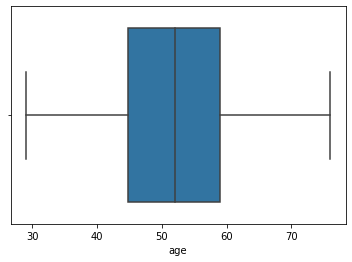

In [34]:
ax1 = sns.boxplot(heart_disease['age'])
#age seems to be important 
#if you are above 120 the risk of heart disease is nearly zero ;)

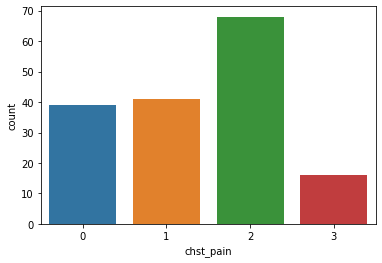

In [35]:
ax1 = sns.countplot(heart_disease['chst_pain'])

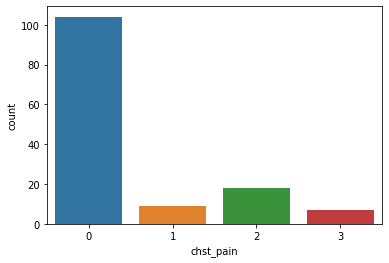

In [36]:
ax1 = sns.countplot(not_heart_disease['chst_pain'])
#little to no chest pain indicates that there is an extremely low probability of heart disease
#from the chart above, chest pain appears to be an important indicator of heart disease

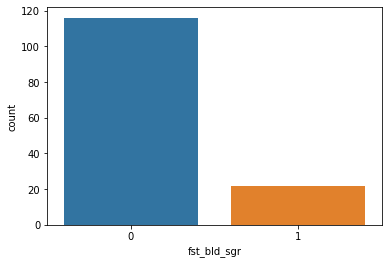

In [37]:
ax1 = sns.countplot(not_heart_disease['fst_bld_sgr'])


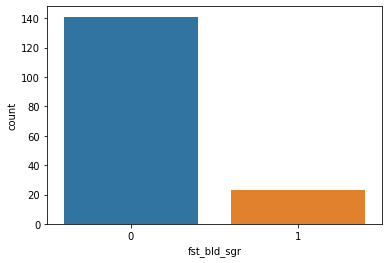

In [38]:
ax1 = sns.countplot(heart_disease['fst_bld_sgr'])
#Since the results look the same, then we can assume that fst_bld_sgr is not an important feature.

In [39]:
sum(heart_disease['fst_bld_sgr'])
len(heart_disease) - sum(heart_disease['fst_bld_sgr'])
#just taking another look at fst_bld_sgr 

141

In [40]:
len(duplicate_free_frame['fst_bld_sgr'])
perc_all = 100 * sum(duplicate_free_frame['fst_bld_sgr'])/len(duplicate_free_frame['fst_bld_sgr'])
print('% of all people with fst_bld_sgr = ' + str(perc_all))

perc_heart_disease = 100 * sum(heart_disease['fst_bld_sgr'])/len(heart_disease['fst_bld_sgr'])
print('% of heart disease with fst_bld_sgr = ' + str(perc_heart_disease))

perc_no_heart_disease = 100 * sum(not_heart_disease['fst_bld_sgr'])/len(not_heart_disease['fst_bld_sgr'])
print('% of no heart disease with fst_bld_sgr = ' + str(perc_no_heart_disease))

#it seems that the fst_bld_sgr doesnt deliver any information to the fact if somebody has heart disease
#so we can delete the fst_bld_sgr feature

% of all people with fst_bld_sgr = 14.900662251655628
% of heart disease with fst_bld_sgr = 14.024390243902438
% of no heart disease with fst_bld_sgr = 15.942028985507246


In [41]:
duplicate_free_frame.head()

,age,gender,chst_pain,rst_bld_prsr,cholest,fst_bld_sgr,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


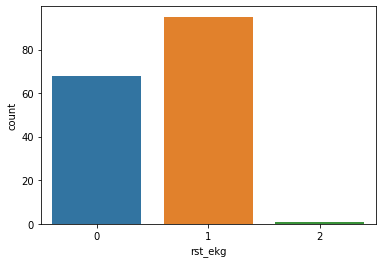

In [42]:
#rst_ekg
ax1 = sns.countplot(heart_disease['rst_ekg'])

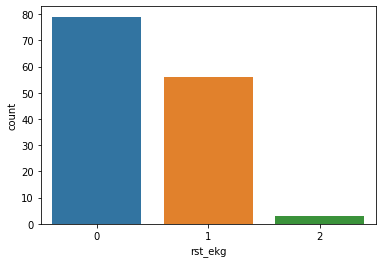

In [43]:
sns.countplot(not_heart_disease['rst_ekg'])

In [44]:
rst0 = heart_disease.loc[heart_disease.loc[:,'rst_ekg']==0.0]
rst1 = heart_disease.loc[heart_disease.loc[:,'rst_ekg']==1.0]
rst2 = heart_disease.loc[heart_disease.loc[:,'rst_ekg']==2.0]

In [45]:
rst0_no = not_heart_disease.loc[not_heart_disease.loc[:,'rst_ekg']==0.0]
rst1_no = not_heart_disease.loc[not_heart_disease.loc[:,'rst_ekg']==1.0]
rst2_no = not_heart_disease.loc[not_heart_disease.loc[:,'rst_ekg']==2.0]

In [46]:
big_rst0 = duplicate_free_frame.loc[duplicate_free_frame.loc[:,'rst_ekg']==0.0]
big_rst1 = duplicate_free_frame.loc[duplicate_free_frame.loc[:,'rst_ekg']==1.0]
big_rst2 = duplicate_free_frame.loc[duplicate_free_frame.loc[:,'rst_ekg']==2.0]

In [47]:
len(duplicate_free_frame['rst_ekg'])
perc_all = 100 * len(big_rst0)/len(duplicate_free_frame['rst_ekg'])
print('% of all people with rst_ekg 1 = ' + str(perc_all))

perc_heart_disease = 100 * len(rst0)/len(heart_disease['rst_ekg'])
print('% of heart disease with rst_ekg 1 = ' + str(perc_heart_disease))

perc_no_heart_disease = 100 * len(rst0_no)/len(not_heart_disease['fst_bld_sgr'])
print('% of without heart disease with rst_ekg 1 = ' + str(perc_no_heart_disease))

% of all people with rst_ekg 1 = 48.675496688741724
% of heart disease with rst_ekg 1 = 41.46341463414634
% of without heart disease with rst_ekg 1 = 57.2463768115942


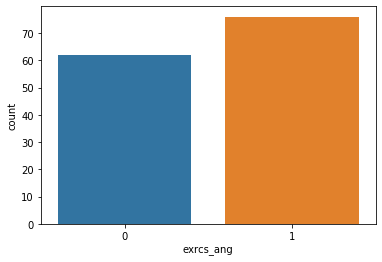

In [48]:
sns.countplot(not_heart_disease['exrcs_ang'])

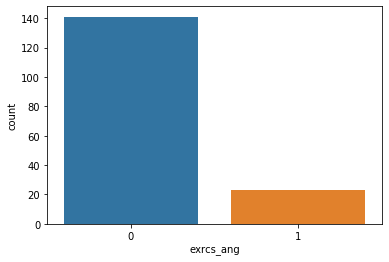

In [49]:
sns.countplot(heart_disease['exrcs_ang'])
#exrcs_ang seems to be an important feature!

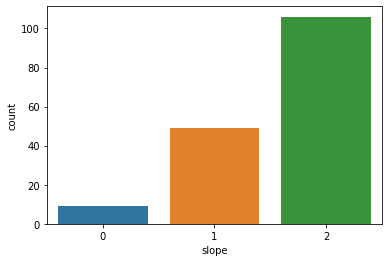

In [50]:
sns.countplot(heart_disease['slope'])

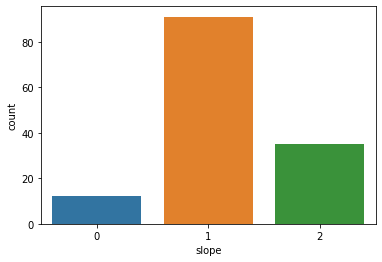

In [51]:
sns.countplot(not_heart_disease['slope'])
#slope seems to be an imortant feature too

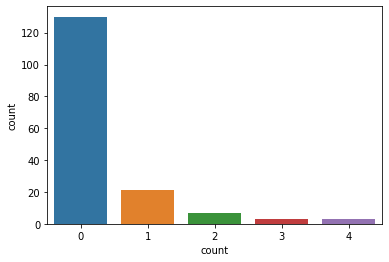

In [52]:
sns.countplot(heart_disease['count'])

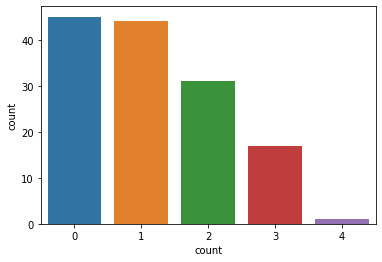

In [53]:
sns.countplot(not_heart_disease['count'])
#Here we see a very important feature. There is clearly something going on here.

C:\Users\Julie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


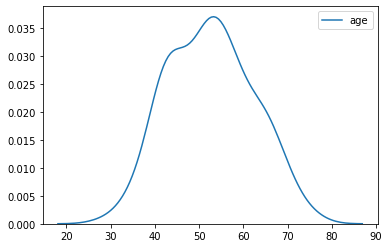

In [54]:
sns.kdeplot(heart_disease['age'])

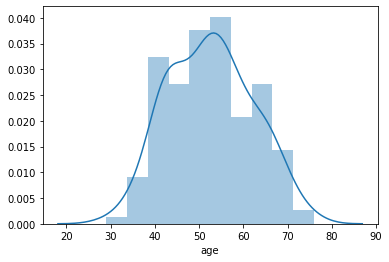

In [55]:
sns.distplot(heart_disease['age'])

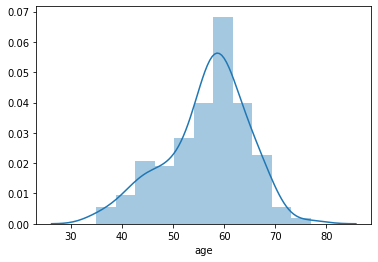

In [56]:
sns.distplot(not_heart_disease['age'])

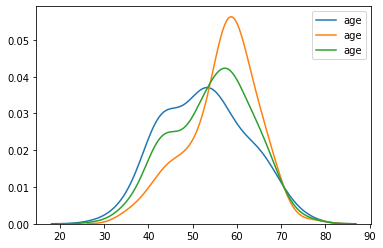

In [57]:
sns.kdeplot(heart_disease['age'])
sns.kdeplot(not_heart_disease['age'])
sns.kdeplot(duplicate_free_frame['age'])
#from this dataset, the most people in this dataset were around 55 and the biggest risk factor seemed to be age 50

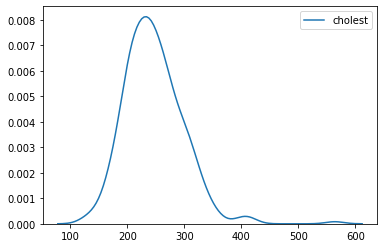

In [58]:
sns.kdeplot(duplicate_free_frame['cholest'])

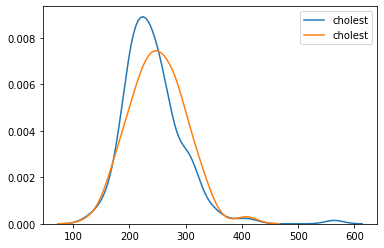

In [59]:
sns.kdeplot(heart_disease['cholest'])
sns.kdeplot(not_heart_disease['cholest'])
# sns.kdeplot(duplicate_free_frame['cholest'])

#surprisingly, cholesterol does not seem to be that important

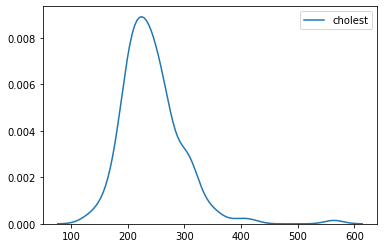

In [60]:
sns.kdeplot(heart_disease['cholest'])

In [61]:
print(not_heart_disease['cholest'].mean())
print(heart_disease['cholest'].mean())
print(duplicate_free_frame['cholest'].mean())
#I am not enterly sure about this the feature, cholest

251.08695652173913
242.640243902439
246.5


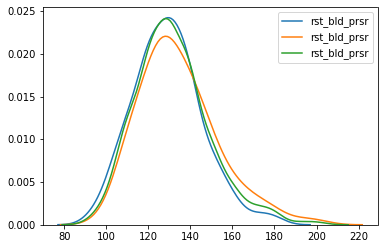

In [62]:
sns.kdeplot(heart_disease['rst_bld_prsr'])
sns.kdeplot(not_heart_disease['rst_bld_prsr'])
sns.kdeplot(duplicate_free_frame['rst_bld_prsr'])

#it seems that this is not very significant as well

161.0
142.0
152.5


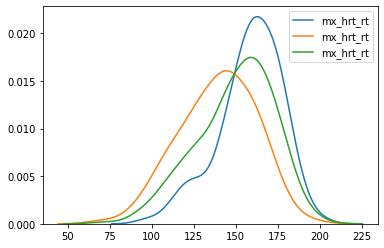

In [63]:
print(heart_disease['mx_hrt_rt'].median())
print(not_heart_disease['mx_hrt_rt'].median())
print(duplicate_free_frame['mx_hrt_rt'].median())

sns.kdeplot(heart_disease['mx_hrt_rt'])
sns.kdeplot(not_heart_disease['mx_hrt_rt'])
sns.kdeplot(duplicate_free_frame['mx_hrt_rt'])

#mx_hrt_rt appears to be an important feature

0.2
1.4
0.8


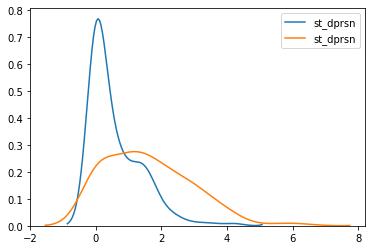

In [64]:
print(heart_disease['st_dprsn'].median())
print(not_heart_disease['st_dprsn'].median())
print(duplicate_free_frame['st_dprsn'].median())

sns.kdeplot(heart_disease['st_dprsn'])
sns.kdeplot(not_heart_disease['st_dprsn'])
# sns.kdeplot(duplicate_free_frame['st_dprsn'])

#st_dprsn definitely appears to be an important feature

In [109]:
duplicate_free_frame = create_duplicate_free()
small_df = duplicate_free_frame
#create now a small dataframe with only the seemingly important features, deleting the ones that are unimportant

In [110]:
duplicate_free_frame = create_duplicate_free()
df_with_gender = duplicate_free_frame

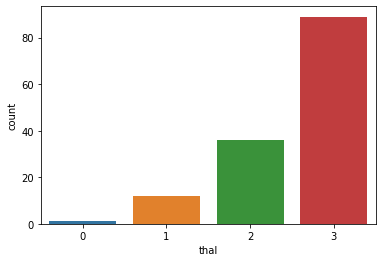

In [67]:
ax1 = sns.countplot(not_heart_disease['thal'])

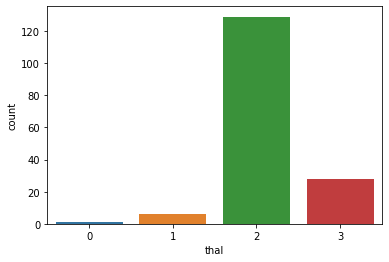

In [68]:
ax1 = sns.countplot(heart_disease['thal'])

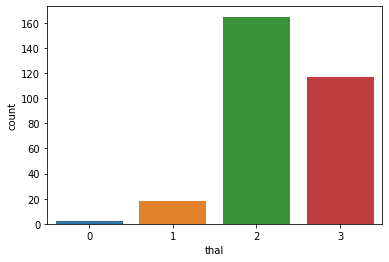

In [69]:
ax1 = sns.countplot(duplicate_free_frame['thal'])

In [70]:
small_df.head()

,age,gender,chst_pain,rst_bld_prsr,cholest,fst_bld_sgr,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
def create_duplicate_free():
    duplicated_entries = all_data.duplicated()
    duplicate_free_frame = all_data.drop(all_data.index[164])
    duplicate_free_frame = duplicate_free_frame.reset_index()
    del duplicate_free_frame['index']
    duplicate_free_frame.columns = ['age', 'gender', 'chst_pain', 'rst_bld_prsr', 'cholest', 'fst_bld_sgr', 'rst_ekg', 'mx_hrt_rt', 'exrcs_ang', 'st_dprsn', 'slope', 'count', 'thal', 'trgt']
    return duplicate_free_frame

In [111]:
del small_df['gender']
del small_df['fst_bld_sgr']
del small_df['rst_bld_prsr']


In [112]:
del df_with_gender['fst_bld_sgr']
del df_with_gender['rst_bld_prsr']

In [115]:
duplicate_free_frame = create_duplicate_free()
duplicate_free_frame.head()

,age,gender,chst_pain,rst_bld_prsr,cholest,fst_bld_sgr,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
smaller_df.head()

,age,chst_pain,cholest,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,3,233,0,150,0,2.3,0,0,1,1
1,37,2,250,1,187,0,3.5,0,0,2,1
2,41,1,204,0,172,0,1.4,2,0,2,1
3,56,1,236,1,178,0,0.8,2,0,2,1
4,57,0,354,1,163,1,0.6,2,0,2,1


In [117]:
smaller_df = small_df

In [118]:
del smaller_df['cholest']

In [119]:
smaller_df.head()

,age,chst_pain,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,3,0,150,0,2.3,0,0,1,1
1,37,2,1,187,0,3.5,0,0,2,1
2,41,1,0,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,1,163,1,0.6,2,0,2,1


In [120]:
small_df
#now we have our small df and will run our model off of this dataframe. 

,age,chst_pain,rst_ekg,mx_hrt_rt,exrcs_ang,st_dprsn,slope,count,thal,trgt
0,63,3,0,150,0,2.3,0,0,1,1
1,37,2,1,187,0,3.5,0,0,2,1
2,41,1,0,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,1,163,1,0.6,2,0,2,1
5,57,0,1,148,0,0.4,1,0,1,1
6,56,1,0,153,0,1.3,1,0,2,1
7,44,1,1,173,0,0.0,2,0,3,1
8,52,2,1,162,0,0.5,2,0,3,1
9,57,2,1,174,0,1.6,2,0,2,1


In [121]:
x_train, x_test, y_train, y_test = train_test_split(small_df.drop(['trgt'], axis='columns'), small_df['trgt'], test_size=0.2)

In [124]:
y_train

31     1
289    0
260    0
71     1
105    1
208    0
78     1
39     1
148    1
136    1
218    0
131    1
234    0
15     1
93     1
144    1
106    1
115    1
292    0
37     1
248    0
191    0
229    0
129    1
247    0
157    1
281    0
215    0
256    0
217    0
      ..
243    0
80     1
250    0
118    1
182    0
112    1
119    1
291    0
240    0
225    0
237    0
84     1
33     1
42     1
290    0
61     1
154    1
159    1
104    1
62     1
43     1
55     1
82     1
100    1
72     1
270    0
255    0
288    0
40     1
297    0
Name: trgt, Length: 241, dtype: int64

In [125]:
model = RandomForestClassifier(n_estimators=210)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=210, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
model.score(x_test,y_test)
#accuracy of ~81%

0.7868852459016393

In [127]:
#lets try our other df's

In [128]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(smaller_df.drop(['trgt'], axis='columns'), smaller_df['trgt'], test_size=0.2)

In [129]:
model = RandomForestClassifier(n_estimators=250)
model.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
model.score(x_test1,y_test1)
#now this time ~85% but with one feature, 'age', less

0.8524590163934426

In [191]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(duplicate_free_frame.drop(['trgt'], axis='columns'), duplicate_free_frame['trgt'], test_size=0.2)

In [131]:
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
model1 = RandomForestClassifier(n_estimators=200, max_depth=3, max_features=3)
model1.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
model1.score(x_test1,y_test1)

0.8032786885245902

In [134]:
best_accuracy = model1.score(x_test1,y_test1)
print(best_accuracy)

0.8032786885245902


In [135]:
#best acc

In [136]:
model.score(x_test2,y_test2)
#with all 10 we get an max accuracy of 83%

0.819672131147541

In [138]:
y_predicted = model.predict(x_test2)

In [139]:
cm = confusion_matrix(y_test2, y_predicted)

Text(69.0, 0.5, 'Truth')

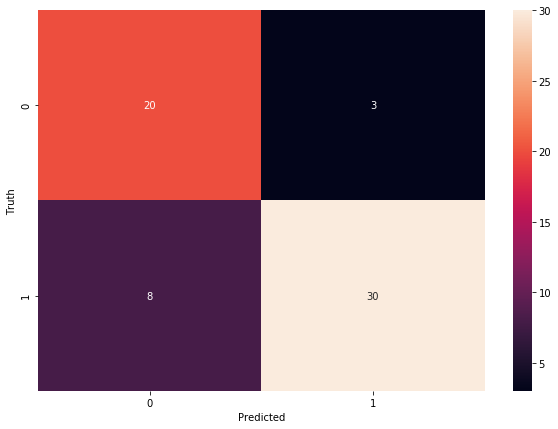

In [140]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [174]:
clf = svm.SVC(gamma=0.00001, C=10000)

In [175]:
clf.fit(x_test1, y_test1)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
clf.score(x_train1, y_train1)
#accuracy of 82% once, but another time 76%. The support vector machine doesn't seem to be the best model here in this case. 


0.7634854771784232

In [195]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.84


C:\Users\Julie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


With the Logistic Regression Classifier, an accuracy of around 85% was reached, so this model seems the best of the three worked with, for predicting heart disease outcomes for the Kaggle Heart Disease dataset (https://www.kaggle.com/ronitf/heart-disease-uci.